### ARIMA:

Forecast the monthly sales data using ARIMA(AutoRegressive Integrated Moving Average) Model.


### ARIMA:

ARIMA stands for AutoRegressive Integrated Moving Average. It is a time series forecasting model that is used to predict the future values and observations based on the past behaviour.


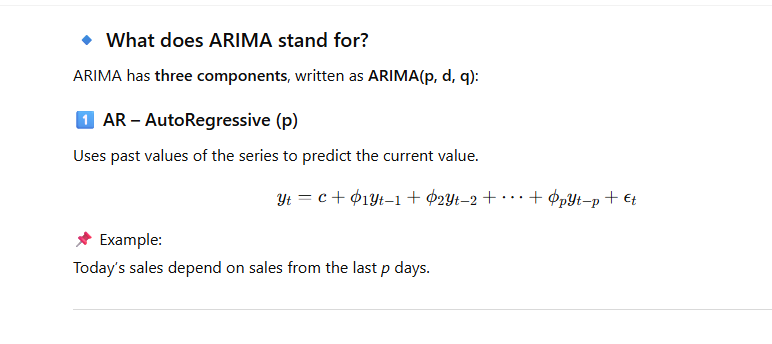

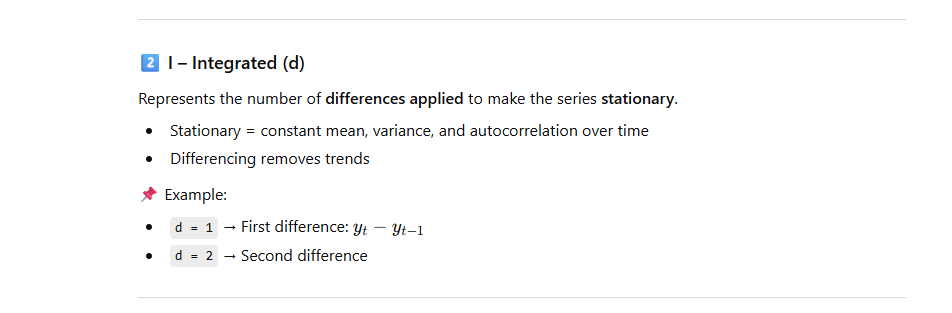  

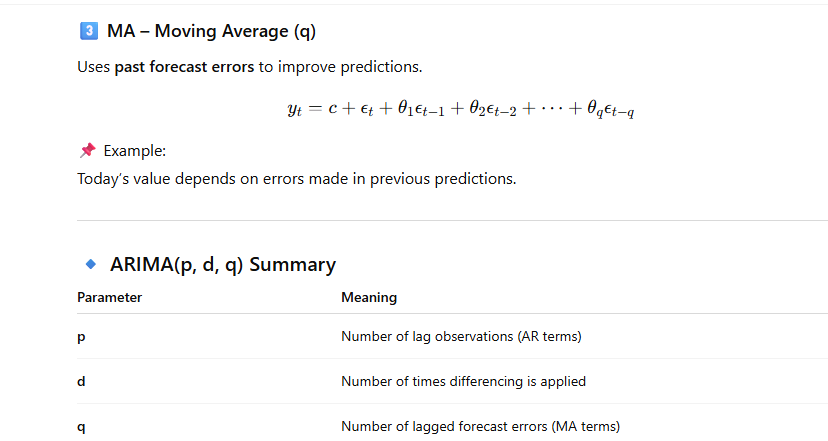

### Importance of ARIMA:-

1. ARIMA is used to predict the future values based on the past values.

2. It is used to make the model stationary.

3. It is used to improve the performance of the model.



### Steps used in this Algorithm:-

1. Import Required Libraries

2. Create Sample Time Series Data

3. Visualize Time Series

4. Check the Stationarity of the Time Series using ADF Test

5. Make Series Stationary using Differencing

6. Train ARIMA Model

7. Forecast Future Values

8. Plot Actual vs Forecast

### Step 1: Import Required Libraries

In [484]:
import  numpy               as   np
import  pandas              as   pd
import  matplotlib.pyplot   as  plt
import  seaborn             as  sns

from    statsmodels.tsa.arima.model  import  ARIMA
from    statsmodels.tsa.stattools    import  adfuller

### Step 2:  Create Sample Time Series Data

In [485]:
# Create monthly date range
date_range = pd.date_range(start="2018-01-01", periods=60, freq="M")

# Generate synthetic sales data
np.random.seed(42)
sales = np.random.randint(200, 400, size=len(date_range)) + np.arange(60) * 5

# Create DataFrame
df = pd.DataFrame({
    "Date": date_range,
    "Sales": sales
})


C:\Users\parag.pujari\AppData\Local\Temp\ipykernel_26188\3797698589.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="2018-01-01", periods=60, freq="M")


In [486]:
df

,Date,Sales
0,2018-01-31,302
1,2018-02-28,384
2,2018-03-31,302
3,2018-04-30,229
4,2018-05-31,326
5,2018-06-30,296
6,2018-07-31,418
7,2018-08-31,255
8,2018-09-30,342
9,2018-10-31,366


In [487]:
### Make the "Date" column as an Index

df.set_index("Date", inplace=True)

In [488]:
df

,Sales
Date,
2018-01-31,302
2018-02-28,384
2018-03-31,302
2018-04-30,229
2018-05-31,326
2018-06-30,296
2018-07-31,418
2018-08-31,255
2018-09-30,342


In [489]:
df.sort_values(by='Date')

,Sales
Date,
2018-01-31,302
2018-02-28,384
2018-03-31,302
2018-04-30,229
2018-05-31,326
2018-06-30,296
2018-07-31,418
2018-08-31,255
2018-09-30,342


### OBSERVATIONS:

1. The above dataset contains the monthly sales value obtained at the end of every month.

### Step 3:  Visualize Time Series

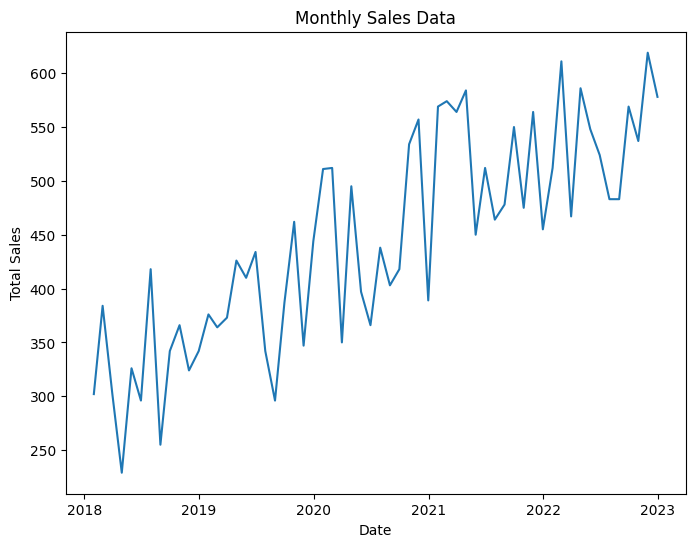

In [490]:
plt.figure(figsize=(8,6))

### plot the monthly sales value
plt.plot(df['Sales'])
plt.title('Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

### OBSERVATIONS:

1. The above graph shows the monthly sales value obtained at the end of every month.

2. From the graph, it is clearly seen that the sales data is increasing exponentially every year.

### Step 4:  Check the Stationarity of the Time Series using ADF Test

adfuller ----->  

It stands for Augmented Dicket Fuller Test. 

It is used to check whether the time series is stationary or not.

In [491]:
### define a function to call the adfuller

from statsmodels.tsa.stattools import adfuller

def adfullertestdata(Series):
    ### determine the adfuller data
    res = adfuller(Series)
    
    print("ADF Statistics:", res[0])
    print("P- Value is:", res[1])


adfullertestdata(df['Sales'])

ADF Statistics: -1.1934869023741093
P- Value is: 0.6763911878040297


### OBSERVATIONS:

1. The adfullertestdata function is used to determine whether the time-series data is stationary or non-stationary.

2. ADF - Statistics measures how strongly the time-series rejects the NULL Hypothesis.

3. P-Value is the point of determining whether the time-series is stationary or non-stationary.

4. if p_value <= 0.05  -----------> Time series is stationary else non-stationary.

5. As the p_value = 0.67 >= 0.05 ----------> Time Series is non-stationary.

In [492]:
df

,Sales
Date,
2018-01-31,302
2018-02-28,384
2018-03-31,302
2018-04-30,229
2018-05-31,326
2018-06-30,296
2018-07-31,418
2018-08-31,255
2018-09-30,342


### Step 5: Make Series Stationary using Differencing


Differencing is used to make the non-stationary time series as stationary

In [493]:
### Find the first order differencing for 'Sales'

df['Sales_Diff'] = df['Sales'].diff()

df.dropna(inplace=True)  ### remove all the NULL Values

In [494]:
df

,Sales,Sales_Diff
Date,,
2018-02-28,384,82.0
2018-03-31,302,-82.0
2018-04-30,229,-73.0
2018-05-31,326,97.0
2018-06-30,296,-30.0
2018-07-31,418,122.0
2018-08-31,255,-163.0
2018-09-30,342,87.0
2018-10-31,366,24.0


### OBSERVATIONS:

1. Now the dataset is obtained with the first order differencing for the 'Sales' column.

In [495]:
adfullertestdata(df['Sales_Diff'])

ADF Statistics: -9.954349838987481
P- Value is: 2.4667624735287312e-17


### OBSERVATIONS:

1.  Here the p-value is 0.0000002466 <= 0.05 , So the time series is stationary.

### Step 6: Train ARIMA Model

In [496]:
from statsmodels.tsa.arima.model import ARIMA

### create a model object for ARIMA
model = ARIMA(df['Sales'], order = (1,1,1))

### Train the ARIMA Model
model_fit = model.fit()

### get the summary of ARIMA Model
model_fit.summary()

C:\Users\parag.pujari\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\parag.pujari\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\parag.pujari\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   59
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -324.122
Date:                Sat, 07 Feb 2026   AIC                            654.244
Time:                        09:23:21   BIC                            660.425
Sample:                    02-28-2018   HQIC                           656.651
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0930      0.180     -0.517      0.605      -0.445       0.259
ma.L1         -0.7049      0.122     -5.784      0.000      -0.944      -0.466
sigma2      4127.4329   1119.600      3.687      0.000    1933.058    6321.808
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 2.46
Prob(Q):                              0.72   Prob(JB):                         0.29
Heteroskedasticity (H):               0.86   Skew:                            -0.09
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### OBSERVATIONS:

1.  ARIMA Model object is created first with the Sales data so as to forecast the future sales data.

2. The order for ARIMA model is (p,d,q) is (1,1,1)

    p = 1 ------------->  1 past value is used to predict the future value.

    d = 1  -------------> 1 order differencing is used to make the time series stationary

    q = 1  ------------> 1 moving average is used to improve the performance of the model.


3. The ARIMA Model is trained and we get the summary of the model.

### Step 7: Forecast Future Values

In [497]:
### Using the trained model for ARIMA , we can forecast for the next 12 time periods

steps = 12

forecast =model_fit.forecast(steps)

In [498]:
print(forecast)

2023-01-31    560.458590
2023-02-28    562.089614
2023-03-31    561.937959
2023-04-30    561.952061
2023-05-31    561.950749
2023-06-30    561.950871
2023-07-31    561.950860
2023-08-31    561.950861
2023-09-30    561.950861
2023-10-31    561.950861
2023-11-30    561.950861
2023-12-31    561.950861
Freq: ME, Name: predicted_mean, dtype: float64


In [499]:
# Create date index for forecast
forecast_index = pd.date_range(
    start=df.index[-1] + pd.DateOffset(months=1),
    periods=12,
    freq="M"
)

C:\Users\parag.pujari\AppData\Local\Temp\ipykernel_26188\598238195.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(


In [500]:
forecast_index

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [501]:
### construct the dataframe from it

df_new = pd.DataFrame(
    {
        "forecast" : forecast
    }, index = forecast_index
)

In [502]:
df_new

,forecast
2023-01-31,560.458590
2023-02-28,562.089614
2023-03-31,561.937959
2023-04-30,561.952061
2023-05-31,561.950749
2023-06-30,561.950871
2023-07-31,561.950860
2023-08-31,561.950861
2023-09-30,561.950861
2023-10-31,561.950861


### OBSERVATIONS:

1. The new dataframe shows the forcasted monthly sales data for the next 12 months.

### Step 8: Plot Actual vs Forecast

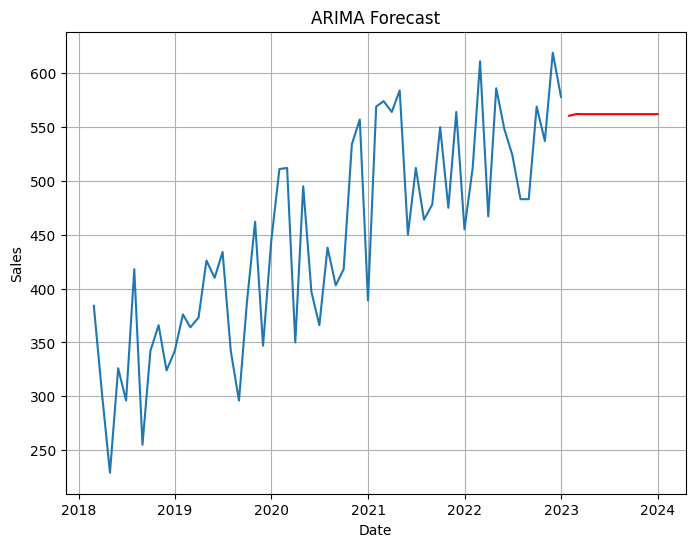

In [503]:
plt.figure(figsize=(8,6))

### Plot the original sales data

plt.plot(df['Sales'], label = 'Actual Sales Data')

### Plot the forecasted sales data

plt.plot(df_new['forecast'], label = 'Forecasted Sales Data', color='red')

### title of the sales data
plt.title("ARIMA Forecast")

### x label
plt.xlabel("Date")

### y label
plt.ylabel("Sales")


plt.grid()

plt.show()

### OBSERVATIONS:

1. The above graph depicts about the monthly sales data.

2. The original data ranging from 2018 till 2023 is non-stationary as shown in the above graph as it has trends and seasonality and is increasing exponentially.

3. Then ARIMA Model is applied on the time series data, then the model has been convertted from non-stationary to stationary and the graph is stable.